Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [43]:
NICKNAME = "underham2ter"

---

# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Идея заключается в том, что по заданным измерениям с погрешностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее равенство:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Пусть
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$

Предполагаем, что ошибки измерения описываются Гауссовым распределением, величины стандартных отклонений которых суть наблюдаемые неопределённости $a = \left< a\right>\pm \sigma_a$.

Гравитационная постоянная -- константа.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [45]:
def error(M1, dM1, M2, dM2, r, dr):
    G = 6.67384 * (10 ** -11)
    F = (G*M1*M2)/(r ** 2)
    sigma = F * np.sqrt((dM1/M1) ** 2 + (dM2/M2) ** 2 + 4 * (dr/r) ** 2)
    return F, sigma

In [46]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639265)


Теперь давайте попробуем получить то же распределение с помощью метода Монте Карло. Он заключается в многократной генерации случайных входных данных и анализе полученных результатов.
В нашем алгоритм следующий:

1.Генерируем гауссово распределение случайных величин $M_1, M_2$ и $r$ ($10^6$ точек), используя средние значение и стандартные отклонения, указаные выше.
    
2.Для каждой реализации вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая моделирует силу методом Монте-Карло и строит нормированную гистограмму.

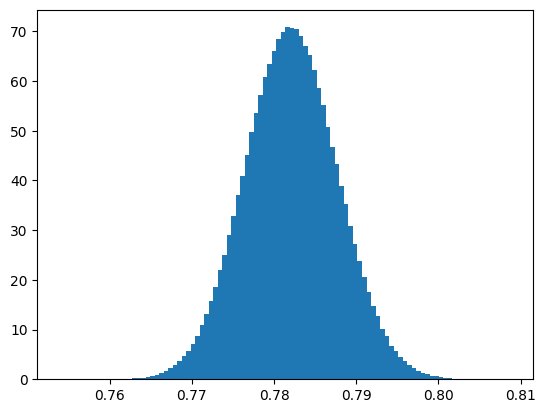

In [47]:

def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6, range=None):
    G = 6.67384 * (10 ** -11)
    M1_ = M1 + dM1*np.random.normal(size = n)
    M2_ = M2 + dM2*np.random.normal(size = n)
    r_ = r + dr*np.random.normal(size = n)
    F_ = (G*M1_*M2_)/(r_ ** 2)

    if range:
        F_ = F_[np.where((F_>range[0]) & (F_<range[1]))]
    # sigma = F_.std()
    # print("sigma = %s" % sigma)
    # sigma ~ theoretical error
    plt.hist(F_, density=True, bins=100)



MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)

# Задание 1.3

Постройте гистограмму распределения силы методом Монте-Карло,вызвав MonteCarloNormal, а также постройте график гауссовой плотности вероятности с параметрами, полученными из error().

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

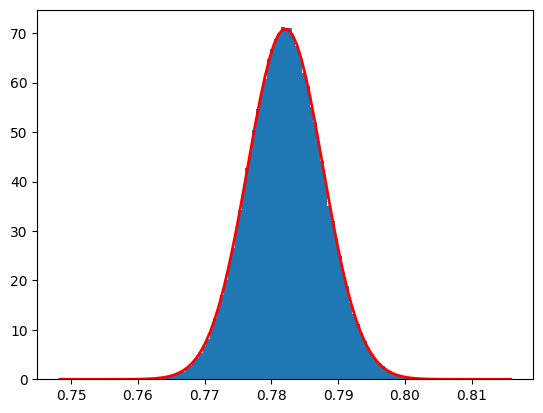

In [48]:
F, sigma = error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
x = np.linspace(F - 6*sigma, F + 6*sigma, 100)


MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (x - F)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Сделайте вывод о согласованности двух подходов.


Выводы сделаны

# Задание 2.1
Повторите те же действия для следующих данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

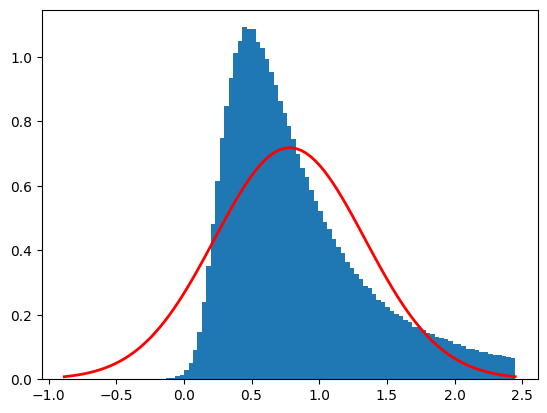

In [49]:

F, sigma = error(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
x = np.linspace(F - 3*sigma, F + 3*sigma, 100)


MonteCarloNormal(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1, range=(F-3*sigma,F + 3*sigma))
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (x - F)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?

Upd: после поправок видно, что на самом деле метод Монте-Карло дает более точный результат! Скорее всего, потому что
теоретические расчеты работают только в приближении для малых погрешностей. Метод Монте-Карло все еще удобен и прост в
вычислении.

Более точным является теоретический подход, так как на брут форс такой большой погрешности нужно очень много итераций.
Простота метода монте-карло в стандартизации подхода к любому виду функции из-за чего не нужно думать :)
